In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile, Path
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

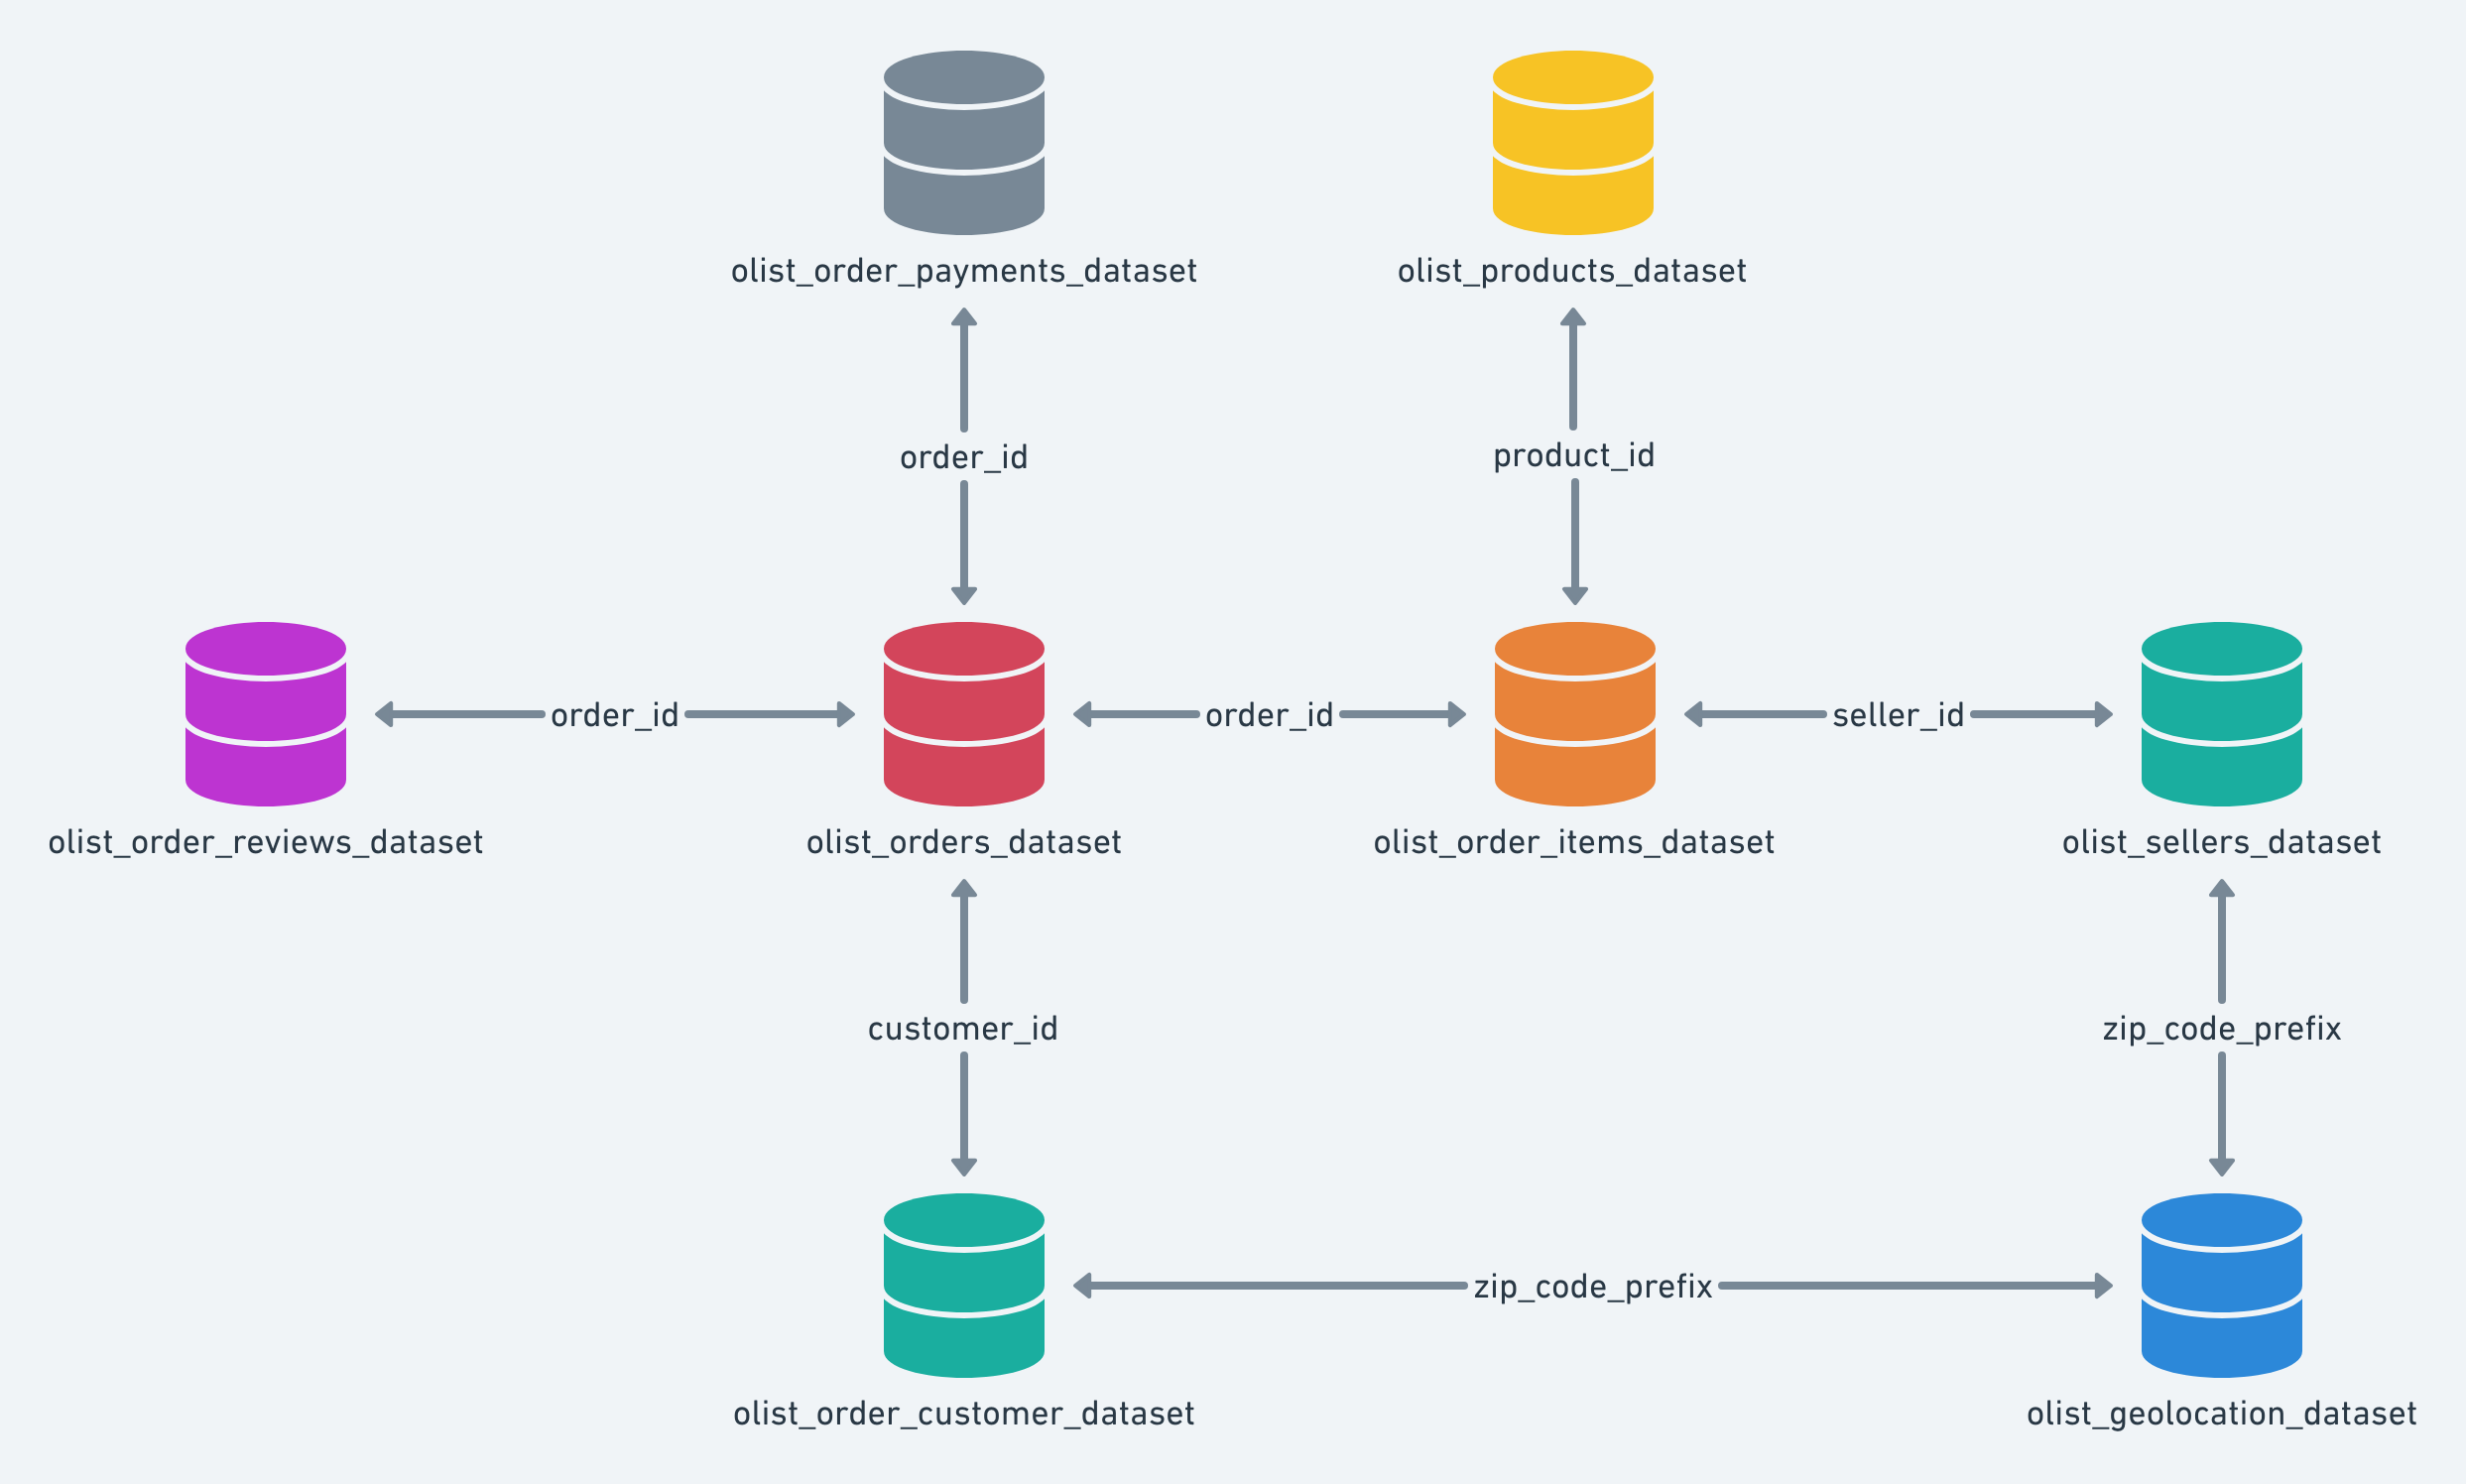

In [2]:
LIST_OF_FILES = ['olist_customers_dataset.csv',
'olist_geolocation_dataset.csv',
'olist_order_items_dataset.csv',
'olist_order_payments_dataset.csv',
'olist_order_reviews_dataset.csv',
'olist_orders_dataset.csv',
'olist_products_dataset.csv',
'olist_sellers_dataset.csv',
'product_category_name_translation.csv']

In [3]:
# Each dataset is stored into a position, accessible by its name as key
dict_dataset = {}

# Read all files
with ZipFile("archive.zip") as myzip:
    for file_name in LIST_OF_FILES:
        with myzip.open(file_name) as file:
            dict_dataset[file_name.split('.')[0]] = pd.read_csv(file, header=0, delimiter=",")

In [4]:
pd.Series(dict_dataset.keys())

0              olist_customers_dataset
1            olist_geolocation_dataset
2            olist_order_items_dataset
3         olist_order_payments_dataset
4          olist_order_reviews_dataset
5                 olist_orders_dataset
6               olist_products_dataset
7                olist_sellers_dataset
8    product_category_name_translation
dtype: object

# 1 Quantas linhas temos na tabela 'olist_orders_dataset.csv'? 

In [5]:
dict_dataset['olist_orders_dataset'].shape[0]

99441

# 2 Quantas linhas temos na tabela 'olist_order_items_dataset.csv'? 

In [6]:
dict_dataset['olist_order_items_dataset'].shape[0]

112650

# 3 Quantas linhas temos na tabela 'olist_customers_dataset.csv'? 

In [7]:
dict_dataset['olist_customers_dataset'].shape[0]

99441

# 4 Quantas linhas temos na tabela 'olist_sellers_dataset.csv'? 

In [8]:
dict_dataset['olist_sellers_dataset'].shape[0]

3095

# 5 Quantas linhas temos na tabela 'olist_products_dataset.csv'? 

In [9]:
dict_dataset['olist_products_dataset'].shape[0]

32951

# 6 Quantas linhas temos na tabela 'olist_order_payments_dataset.csv'? 

In [10]:
dict_dataset['olist_order_payments_dataset'].shape[0]

103886

# 7 Quantas linhas temos na tabela 'olist_order_reviews_dataset.csv'? 

In [11]:
dict_dataset['olist_order_reviews_dataset'].shape[0]

99224

# 8 Quantas linhas temos na tabela 'olist_geolocation_dataset.csv'? 

In [12]:
dict_dataset['olist_geolocation_dataset'].shape[0]

1000163

# 9 Quantos CEPS únicos temos no banco de dados? 

In [13]:
dict_dataset['olist_geolocation_dataset'].geolocation_zip_code_prefix.nunique()

19015

# 10 Quantas latitudes e longitudes estão expressas na base de dados? 

In [14]:
df = dict_dataset['olist_geolocation_dataset']

In [15]:
df.drop_duplicates(['geolocation_lat','geolocation_lng']).shape[0]

718463

# 11 Crie um método para agrupar todas as diferentes latitudes e longitudes que um determinado CEP possui para um valor único por CEP. Dica Use a função group_by e aggragate 

In [16]:
df = dict_dataset['olist_geolocation_dataset']

In [17]:
%%time
df['LAT_LONG'] = df.apply(lambda row :  str(row['geolocation_lat']) + str(row['geolocation_lng']), axis=1)

Wall time: 19 s


In [18]:
df_lat_long_in_CEPs = df.groupby('geolocation_zip_code_prefix').apply(lambda group : group['LAT_LONG'].nunique())

In [19]:
df_lat_long_in_CEPs =  df_lat_long_in_CEPs.rename('diff_lat_long').reset_index()

In [20]:
df_lat_long_in_CEPs.sort_values('diff_lat_long', ascending=False).head(10)

,geolocation_zip_code_prefix,diff_lat_long
9536,38400,746
4501,11680,727
8728,35500,726
4528,11740,666
9015,36400,627
9719,39400,620
8579,35162,611
9542,38408,600
9239,37200,595
8867,35900,589


In [21]:
df[df['geolocation_zip_code_prefix'] == 38400].head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,LAT_LONG
645450,38400,-18.915960,-48.278974,uberlandia,MG,-18.91595976602804-48.278974174995646
645456,38400,-18.900442,-48.260759,uberlandia,MG,-18.900442445467096-48.26075855813959
645460,38400,-18.913015,-48.262132,uberlandia,MG,-18.913015152374623-48.26213189982101
645461,38400,-18.922381,-48.282111,uberlandia,MG,-18.92238123980033-48.28211103081535
645471,38400,-18.922160,-48.271125,uberlandia,MG,-18.922160210658436-48.27112484984707


# 12 Crie um método para agregar todas as tabelas disponíveis em uma única tabela. 

In [22]:
LIST = []
for i in dict_dataset:
    LIST.append((i,dict_dataset[i].shape[0]))

In [23]:
pd.DataFrame(LIST, columns=['table', 'size']).sort_values('size', ascending=False)

,table,size
1,olist_geolocation_dataset,1000163
2,olist_order_items_dataset,112650
3,olist_order_payments_dataset,103886
0,olist_customers_dataset,99441
5,olist_orders_dataset,99441
4,olist_order_reviews_dataset,99224
6,olist_products_dataset,32951
7,olist_sellers_dataset,3095
8,product_category_name_translation,71


In [24]:
# olist_order_items_dataset

In [25]:
df_geolocation_dataset = dict_dataset['olist_geolocation_dataset']
df_orders_dataset = dict_dataset['olist_orders_dataset']
df_order_items_dataset = dict_dataset['olist_order_items_dataset']
df_order_payments_dataset = dict_dataset['olist_order_payments_dataset']
df_customers_dataset = dict_dataset['olist_customers_dataset']
df_order_reviews_dataset = dict_dataset['olist_order_reviews_dataset']
df_products_dataset = dict_dataset['olist_products_dataset']
df_sellers_dataset = dict_dataset['olist_sellers_dataset']
df_product_category_name_translation = dict_dataset['product_category_name_translation']

In [26]:
# <!-- ![backupPreview.png](attachment:backupPreview.png) -->

## A: order_items_dataset + products_dataset

In [27]:
A = df_order_items_dataset.merge(df_products_dataset, on='product_id', how='left')

In [28]:
A.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0


## B: sellers_dataset + geolocation_dataset

In [29]:
B = df_sellers_dataset.merge(df_geolocation_dataset.drop_duplicates('geolocation_zip_code_prefix'), how='left', left_on=['seller_zip_code_prefix'], right_on=['geolocation_zip_code_prefix'])

In [30]:
B.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,LAT_LONG
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023.0,-22.898536,-47.063125,campinas,SP,-22.898536428530225-47.063125168330544
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,13844.0,-22.382941,-46.946641,mogi-guacu,SP,-22.382941116125448-46.94664125419024


## C: A + B

In [31]:
C = A.merge(B, how='left', on='seller_id')

In [32]:
C.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,LAT_LONG
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,14.0,27277,volta redonda,SP,27277.0,-22.498183,-44.123614,volta redonda,RJ,-22.498182754371285-44.12361371579433
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,40.0,3471,sao paulo,SP,3471.0,-23.566258,-46.518417,sao paulo,SP,-23.56625832001269-46.51841724632121


## D: customer_dataset + geolocation_dataset

In [33]:
D = df_customers_dataset.merge(df_geolocation_dataset.drop_duplicates('geolocation_zip_code_prefix'), how='left', left_on=['customer_zip_code_prefix'], right_on=['geolocation_zip_code_prefix'])

## E: All left tables

In [34]:
E = df_orders_dataset.merge(df_order_payments_dataset, how='left', on='order_id') \
                 .merge(df_order_reviews_dataset, how='left', on='order_id') \
                 .merge(D, how='left', on='customer_id')

## FULL TABLE

In [35]:
df_full_table = E.merge(C, how='left', on='order_id')

# 13 Quantas ordens distintas temos em nosso banco de dados? 

In [36]:
df_full_table.order_id.nunique()

99441

# 14 Quantos clientes distintos existem em nosso banco de dados? 

In [37]:
df_full_table.customer_id.nunique()

99441

# 15 Quantos vendedores distintos existem em nosso bando de dados? 

In [38]:
df_full_table.seller_id.nunique()

3095

# 16 Qual a porcentagem de vendas feitas com cartão de crédito? 

In [39]:
porcentagem = round(df_full_table.payment_type.value_counts(normalize=True)['credit_card'] * 100, 2)
print(f'{porcentagem} %')

73.67 %


# 17 Qual a porcentagem de vendas feitas com cartão de débito? 

In [40]:
porcentagem = round(df_full_table.payment_type.value_counts(normalize=True)['debit_card'] * 100, 2)
print(f'{porcentagem} %')

1.43 %


# 18 Qual a porcentagem de reviews menor do que 2 estreles temos em nossa base? 

In [41]:
porcentagem = round((df_full_table.review_score.value_counts(normalize=True)[1.0] * 100), 2)
print(f'{porcentagem} %')

13.06 %


# 19 Quantas categorias de produto distintas existem em nossa base? 

In [42]:
df_full_table.product_category_name.nunique()

73

# 20 Qual a média de scores por categoria de produto? 

In [43]:
# [col for col in df_full_table.columns if 'com' in col]

In [44]:
df_full_table.groupby('product_category_name').agg({'review_score': 'mean'}).sort_values('review_score', ascending=False).head(10)

,review_score
product_category_name,
cds_dvds_musicais,4.642857
fashion_roupa_infanto_juvenil,4.500000
livros_interesse_geral,4.438503
flores,4.419355
livros_importados,4.419355
construcao_ferramentas_ferramentas,4.415842
livros_tecnicos,4.375465
alimentos_bebidas,4.324138
portateis_casa_forno_e_cafe,4.320513


# 21 Quais as 5 categorias que mais possuem produtos em nossa base? 

In [45]:
df_products_dataset.groupby('product_category_name').size().rename('qtd').reset_index().sort_values('qtd', ascending=False).head(5)

,product_category_name,qtd
13,cama_mesa_banho,3029
32,esporte_lazer,2867
54,moveis_decoracao,2657
11,beleza_saude,2444
72,utilidades_domesticas,2335


# 22 Quantos comentários existem na base? 

In [46]:
# TIRANDO AS COM CORPO DA MENSAGEM NULOS
df_order_reviews_dataset.review_comment_message.dropna().nunique()

36159

In [47]:
# TIRANDO AS COM TITULO DA MENSAGEM NULOS
df_order_reviews_dataset.review_comment_title.dropna().nunique()

4527

In [48]:
# TIRANDO AS COM TITULO E CORPO DA MENSAGEM NULOS
c1 = df_order_reviews_dataset.review_comment_message.isna() == False
c2 = df_order_reviews_dataset.review_comment_title.isna() == False
df_order_reviews_dataset[c1 & c2].shape[0]

9839

# 23 Crie uma nuvem de palavras que mostre as principais informações contidadas nos comentários. 

In [49]:
! pip install wordcloud

In [50]:
# importar os pacotes necessários
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [51]:
# FUNDE TODOS OS COMENTARIOS
ALL_COMMENTS = ', '.join(df_order_reviews_dataset.review_comment_message.dropna())

In [52]:
# ELIMINA PONTUACOES E TAGS INDESEJADAS
ALL_COMMENTS = ALL_COMMENTS.replace('\n','').replace('\r','').replace('.',' ').replace(',',' ').strip()

In [53]:
# REMOVE ESPACOS ADICIONAIS USANDO REGEX
import re
ALL_COMMENTS = re.sub(' +', ' ', ALL_COMMENTS)

In [54]:
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os","e"])

In [55]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(ALL_COMMENTS)

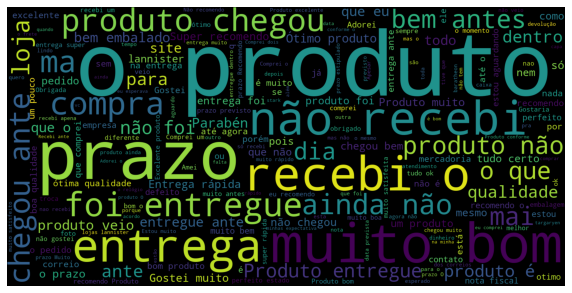

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

# 24 Qual a porcentagem de ordens entregues? 

In [57]:
porcentagem = round(df_full_table.order_status.value_counts(normalize=True)['delivered'] * 100, 2)
print(f'{porcentagem} % das ordens foram entregues')

97.13 % das ordens foram entregues


# 25 Qual o tempo médio entre a compra e a aprovação da compra? 

In [58]:
# Somente um registro por compra
df_sem_duplicados = df_full_table.drop_duplicates('order_id')

In [59]:
df_sem_duplicados['order_purchase_timestamp'] = pd.to_datetime(df_sem_duplicados['order_purchase_timestamp'])

In [60]:
df_sem_duplicados['order_approved_at'] = pd.to_datetime(df_sem_duplicados['order_approved_at'])

In [61]:
df_sem_duplicados['atraso_pedido_aprov'] = df_sem_duplicados['order_approved_at'] - df_sem_duplicados['order_purchase_timestamp']

In [62]:
df_sem_duplicados.atraso_pedido_aprov.mean()

Timedelta('0 days 10:25:08.739486910')

# 26 Qual o tempo médio entre a compra e a entrega? 

In [63]:
df_sem_duplicados['order_delivered_customer_date'] = pd.to_datetime(df_sem_duplicados['order_delivered_customer_date'])

In [64]:
df_sem_duplicados['atraso_pedido_entrega'] = df_sem_duplicados['order_delivered_customer_date'] - df_sem_duplicados['order_purchase_timestamp']

In [65]:
df_sem_duplicados.atraso_pedido_entrega.mean()

Timedelta('12 days 13:24:31.879068369')

# 27 Qual a diferença média entre a data prevista de entrega e a data efetiva de entrega? 

In [66]:
df_sem_duplicados['order_estimated_delivery_date'] = pd.to_datetime(df_sem_duplicados['order_estimated_delivery_date'])
df_sem_duplicados['order_delivered_customer_date'] = pd.to_datetime(df_sem_duplicados['order_delivered_customer_date'])

In [67]:
df_sem_duplicados['atraso_estimado_entrega'] = df_sem_duplicados['order_estimated_delivery_date'] - df_sem_duplicados['order_delivered_customer_date']

In [68]:
df_sem_duplicados['atraso_estimado_entrega'].mean()

Timedelta('11 days 04:17:55.957616402')

# 28 Em qual período do dia as pessoas mais costumam fazer compras por estado? Divida entre manhã, tarde e noite. 

In [69]:
df_full_table['order_purchase_timestamp'] = pd.to_datetime(df_sem_duplicados['order_purchase_timestamp'])

In [70]:
df_full_table_sem_nulls = df_full_table[df_full_table.order_purchase_timestamp.isna() == False]

In [71]:
df_full_table_sem_nulls['purchace_time'] = df_full_table_sem_nulls['order_purchase_timestamp'].dt.time

In [72]:
import datetime

meio_dia = datetime.time(12,0,0)
inicio_manha = datetime.time(6,0,0)
inicio_noite = datetime.time(18,0,0)
fim_noite = datetime.time(23,59,59)
inicio_madrugada = datetime.time(0,0,0)

def get_day_period(time):
    if ((time >= inicio_noite) & (time < fim_noite)) | (time >= inicio_madrugada) & (time < inicio_manha):
        return 'noite'
    elif  (time >= inicio_manha) & (time < meio_dia):
        return 'manha'
    
    return 'tarde'

df_full_table_sem_nulls['periodo_dia'] = df_full_table_sem_nulls['purchace_time'].apply(lambda x : get_day_period(x))

In [73]:
df_full_table_sem_nulls.groupby(['customer_state', 'periodo_dia']).size().rename('qtd') \
                    .reset_index() \
                    .sort_values(['customer_state', 'qtd'], ascending = [True, False]) \
                    .head(10)

,customer_state,periodo_dia,qtd
1,AC,noite,40
2,AC,tarde,35
0,AC,manha,6
4,AL,noite,169
5,AL,tarde,161
3,AL,manha,83
8,AM,tarde,68
7,AM,noite,61
6,AM,manha,19
10,AP,noite,29


# 29 Quais os diferentes tipos de dados temos em nossa tabela? 

In [74]:
df_full_table.dtypes.value_counts()

object            28
float64           21
datetime64[ns]     1
int64              1
dtype: int64

# 30 Quantos clientes distintos temos por estado? 

In [75]:
df_clients_no_duplicates = df_full_table.drop_duplicates('customer_id')

In [76]:
df_clients_no_duplicates.groupby('customer_state').size().rename('qtd').reset_index().sort_values('qtd',ascending=False)

,customer_state,qtd
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045
23,SC,3637
4,BA,3380
6,DF,2140
7,ES,2033
8,GO,2020


# 31 Quantos vendedores distintos temos por estado? 

In [77]:
df_sellers_no_duplicates = df_full_table.drop_duplicates('seller_id')
df_sellers_no_duplicates.groupby('seller_state').size().rename('qtd').reset_index().sort_values('qtd',ascending=False)

,seller_state,qtd
22,SP,1849
15,PR,349
8,MG,244
20,SC,190
16,RJ,171
19,RS,129
6,GO,40
4,DF,30
5,ES,23
2,BA,19


# 32 Quantos clientes distintos temos na região metropolitana de São Paulo? 

In [78]:
RMSP = ['São Paulo',
'Arujá',
'Barueri',
'Biritiba Mirim',
'Caieiras',
'Cajamar',
'Carapicuíba',
'Cotia',
'Diadema',
'Embu',
'Embu-Guaçu',
'Ferraz de Vasconcelos',
'Francisco Morato',
'Franco da Rocha',
'Guararema',
'Guarulhos',
'Itapecerica da Serra',
'Itapevi',
'Itaquaquecetuba',
'Jandira',
'Juquitiba',
'Mairiporã',
'Mauá',
'Mogi das Cruzes',
'Osasco',
'Pirapora do Bom Jesus',
'Poá',
'Ribeirão Pires',
'Rio Grande da Serra',
'Salesópolis',
'Santa Isabel',
'Santana do Parnaíba',
'Santo André',
'São Bernardo do Campo',
'São Caetano do Sul',
'São Lourenço da Serra Suzano',
'Suzano',
'Taboão da Serra',
'Vargem Grande Paulista']

In [79]:
from unidecode import unidecode

RMSP = [unidecode(i.lower()) for i in RMSP]

In [80]:
CUSTOMERS_N_UNIQUE_RMSP = df_full_table[df_full_table.seller_city.isin(RMSP)].customer_id.nunique()
print(f'Há {CUSTOMERS_N_UNIQUE_RMSP} clientes distintos na RMSP.')

Há 35079 clientes distintos na RMSP.


# 33 Qual a média de valor, por estado, que os clientes atribuem aos vendedores? 

In [81]:
df_full_table.groupby('customer_state').agg({'review_score' : 'mean'})

,review_score
customer_state,
AC,4.094737
AL,3.715835
AM,4.070175
AP,4.240964
BA,3.807235
CE,3.810167
DF,3.987981
ES,3.974656
GO,3.975710


# 34 Qual o valor médio de frete cobrado por estado? 

In [82]:
df_full_table.groupby('seller_state').agg({'freight_value':'mean'})

,freight_value
seller_state,
AC,32.840000
AM,27.266667
BA,31.133157
CE,44.159029
DF,21.642086
ES,32.223359
GO,24.354636
MA,29.961146
MG,24.106845


# 35 Trace um histograma de preços divididos em 4 quantis. 

In [83]:
# [col for col in df_full_table.columns if 'price' in col]

In [84]:
df_prices = df_full_table.drop_duplicates('order_id')[['order_id', 'price']]

In [85]:
import math

In [86]:
# df_prices_sampled = df_prices.sample(math.floor(df_prices.shape[0]*0.5))

In [87]:
quantiles = np.quantile(a = np.array(df_prices['price'].dropna()), q=[0.25,0.5,0.75])
q1 = quantiles[0]
q2 = quantiles[1]
q3 = quantiles[2]

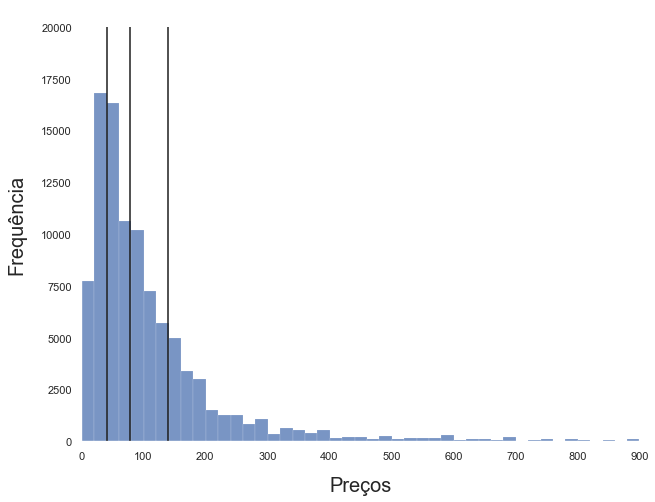

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white'}) #para dark mode no vscode
fig, ax1 = plt.subplots(nrows=1,figsize=(10,8))

sns.histplot(data=df_prices, x="price", binwidth=20, ax = ax1)

# Changing ticks formatting
ax1.set_xlim(0,900)
ax1.set_xlabel(xlabel='Preços', labelpad=15)
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel(ylabel='Frequência', labelpad=15)
ax1.yaxis.label.set_fontsize(20)

ax1.vlines(x=q1, ymin=0, ymax=20000, colors='k', linestyles='solid', label='-')
ax1.vlines(x=q2, ymin=0, ymax=20000, colors='k', linestyles='solid', label='-')
ax1.vlines(x=q3, ymin=0, ymax=20000, colors='k', linestyles='solid', label='-')

# 36 Trace um histograma de preços divididos em 10 quantis. 

In [89]:
part = [round(i*0.1, 1) for i in list(range(11))]

In [90]:
quantiles = np.quantile(a = np.array(df_prices['price'].dropna()), q=part)


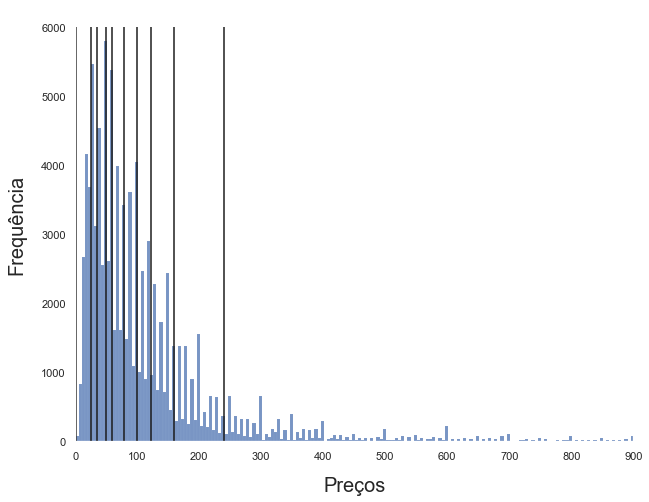

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white'}) #para dark mode no vscode
fig, ax1 = plt.subplots(nrows=1,figsize=(10,8))

sns.histplot(data=df_prices, x="price", binwidth=5, ax = ax1)

# Changing ticks formatting
ax1.set_xlim(0,900)
ax1.set_xlabel(xlabel='Preços', labelpad=15)
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel(ylabel='Frequência', labelpad=15)
ax1.yaxis.label.set_fontsize(20)


for i in quantiles:
    ax1.vlines(x=i, ymin=0, ymax=6000, colors='k', linestyles='solid', label='-')

# 37 Qual a porcentagem de vendas é feita no estado de São Paulo e estão no primeiro quartil? 

# 38 Qual o valor médio das compras no primeiro quantil? 

# 39 Considerando uma base de 6.000.000 de clientes na Olist, qual a quantidade de clientes no primeiro quartil e de São Paulo podemos atingir? 

# 40 Qual o TAM (Tamanho de Mercado) no contexto descrito anteriormente? 

In [92]:
df_full_table.groupby('customer_unique_id').size().sort_values(ascending=False)

customer_unique_id
9a736b248f67d166d2fbb006bcb877c3    75
6fbc7cdadbb522125f4b27ae9dee4060    38
f9ae226291893fda10af7965268fb7f6    35
8af7ac63b2efbcbd88e5b11505e8098a    29
569aa12b73b5f7edeaa6f2a01603e381    26
                                    ..
5b9f3a22a2f637041e498817b1e956cd     1
5b9e2d80a7ebfcf10ed0fa934a6de8f9     1
5b9ded8428365feb7e1eac3fc3085132     1
5b9dadf41a68e39b12686c14eec1eb36     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Length: 96096, dtype: int64

In [93]:
df_specific = df_full_table[df_full_table['customer_unique_id'] == '9a736b248f67d166d2fbb006bcb877c3']

In [94]:
df_specific.groupby('order_id').size()

order_id
67d83bd36ec2c7fb557742fb58837659    12
895ab968e7bb0d5659d16cd74cd1650c    63
dtype: int64

In [95]:
# Veriricar se as entregas da mesma order_id vao sempre juntas

In [96]:
df_geolocation_dataset = dict_dataset['olist_geolocation_dataset']
df_orders_dataset = dict_dataset['olist_orders_dataset']
df_order_items_dataset = dict_dataset['olist_order_items_dataset']
df_order_payments_dataset = dict_dataset['olist_order_payments_dataset']
df_customers_dataset = dict_dataset['olist_customers_dataset']
df_order_reviews_dataset = dict_dataset['olist_order_reviews_dataset']
df_products_dataset = dict_dataset['olist_products_dataset']
df_sellers_dataset = dict_dataset['olist_sellers_dataset']
df_product_category_name_translation = dict_dataset['product_category_name_translation']

In [97]:
df_full_table.groupby(['product_id'])['seller_id'].nunique().rename('nunique').reset_index().sort_values('nunique',ascending=False)

,product_id,nunique
27128,d285360f29ac7fd97640bf0baef03de0,8
13626,69455f41626a745aea9ee9164cb9eafd,8
8677,4298b7e67dc399c200662b569563a2b2,7
7131,36f60d45225e60c7da4558b070ce4b60,7
13101,656e0eca68dcecf6a31b8ececfabe3e8,7
...,...,...
11198,562f4fcb4d0fb2cd4b547e42e5bfd2e6,1
11197,562f1e9b58672d3c016b72f43579d118,1
11196,562f0027bf0b43b487536b01b2002a3e,1
11195,562cdf9387a027681e0a59b4202e9a40,1


In [98]:
pd.to_datetime(df_full_table['order_delivered_carrier_date']).max() - pd.to_datetime(df_full_table['order_delivered_carrier_date']).min()

Timedelta('703 days 09:14:27')

In [99]:
df_products_per_seller = df_full_table.groupby(['seller_id'])['product_id'].nunique().rename('nunique').reset_index().sort_values('nunique',ascending=False)

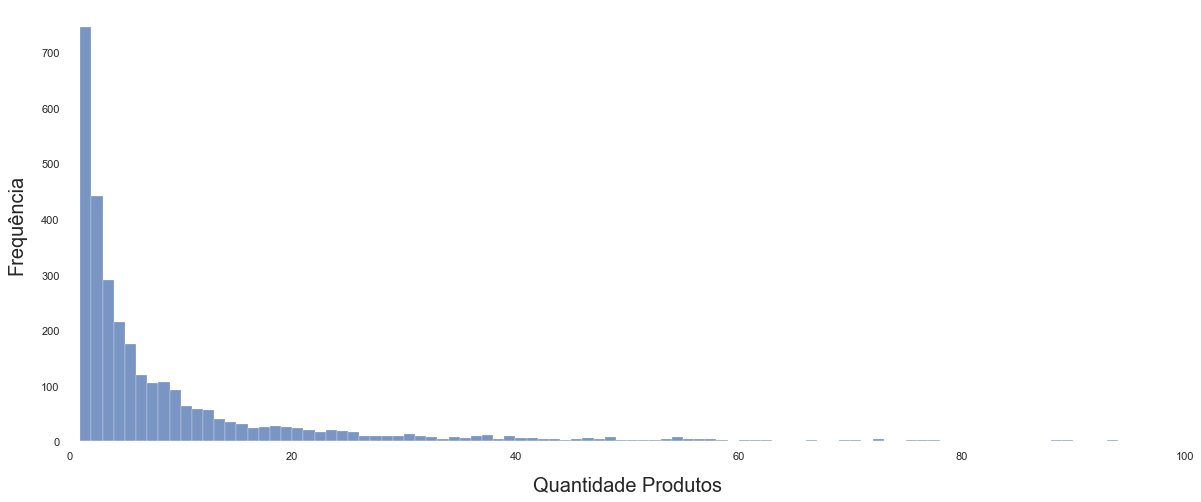

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white'}) #para dark mode no vscode
fig, ax1 = plt.subplots(nrows=1,figsize=(20,8))

sns.histplot(data=df_products_per_seller, x="nunique", binwidth=1, ax = ax1)

# Changing ticks formatting
ax1.set_xlim(0,100)
ax1.set_xlabel(xlabel='Quantidade Produtos', labelpad=15)
ax1.xaxis.label.set_fontsize(20)
ax1.set_ylabel(ylabel='Frequência', labelpad=15)
ax1.yaxis.label.set_fontsize(20)

In [ ]:
! conda install -c conda-forge geopandas

In [ ]:
import geopandas

In [ ]:
ax = geoplot.kdeplot(
    collisions.head(1000),
    clip=boroughs.geometry,
    shade=True,
    cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())


geoplot.polyplot(boroughs, ax=ax, zorder=1)

In [106]:
df_full_table['order_purchase_timestamp'] = pd.to_datetime(df_full_table['order_purchase_timestamp'])
df_full_table['order_delivered_customer_date'] = pd.to_datetime(df_full_table['order_delivered_customer_date'])

In [109]:
df_full_table['atraso'] = df_full_table['order_delivered_customer_date'] - df_full_table['order_purchase_timestamp']

In [113]:
df_full_table.groupby('customer_state').agg({'atraso' : 'mean'}).reset_index().sort_values('atraso', ascending=False)

,customer_state,atraso
21,RR,29 days 09:18:03.975609756
3,AP,27 days 04:26:29.850746268
2,AM,26 days 10:13:25.613793103
1,AL,24 days 13:03:09.103274559
13,PA,23 days 18:33:00.021141649
9,MA,21 days 13:45:05.167364016
24,SE,21 days 12:28:29.707462686
5,CE,21 days 06:23:52.394057857
0,AC,21 days 00:51:25.600000
14,PB,20 days 10:14:32.721470019


In [114]:
# df_full_table.groupby('cust').agg({'atraso' : 'mean'}).reset_index().sort_values('atraso', ascending=False)